# Facial Keypoint Detection Kaggle Competition

Kaggle competition to detect eyes, mouth and nose in grayscaled images.

In [44]:
%matplotlib inline
%load_ext autoreload
%autoreload 1

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [45]:
%aimport keypoints
%aimport plots
%aimport data
%aimport pipeline
%aimport submit
%aimport features

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

## Run pipeline

Set up the model, learn and predict.

In [47]:
X, Y, header = data.df_train()
Xpredict = data.df_predict()

In [54]:
p = pipeline.Pipeline(results_dir = 'results-notebook')

In [17]:
estimator = p.train(p.model(), X, Y)

In [18]:
Ypredict = p.predict(estimator, Xpredict)

## Images and keypoints from the training set

These are the given keypoints.

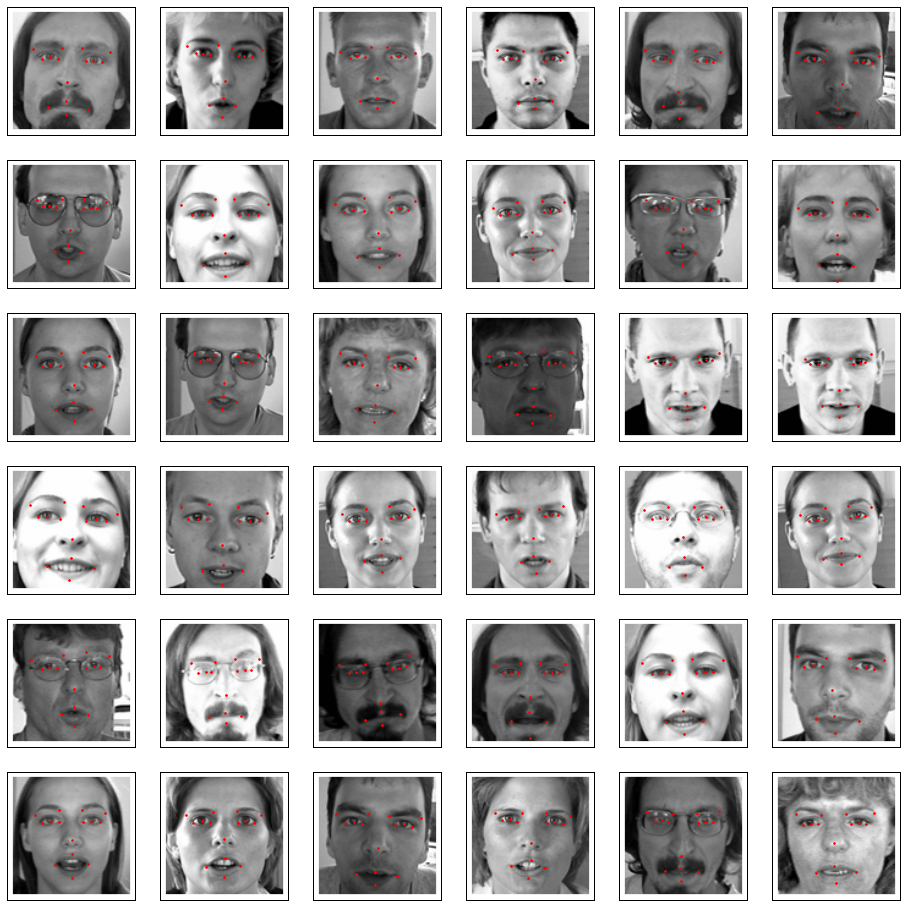

In [50]:
plots.show_imgs(X, Y, color = 'red')

Preprocessed images:

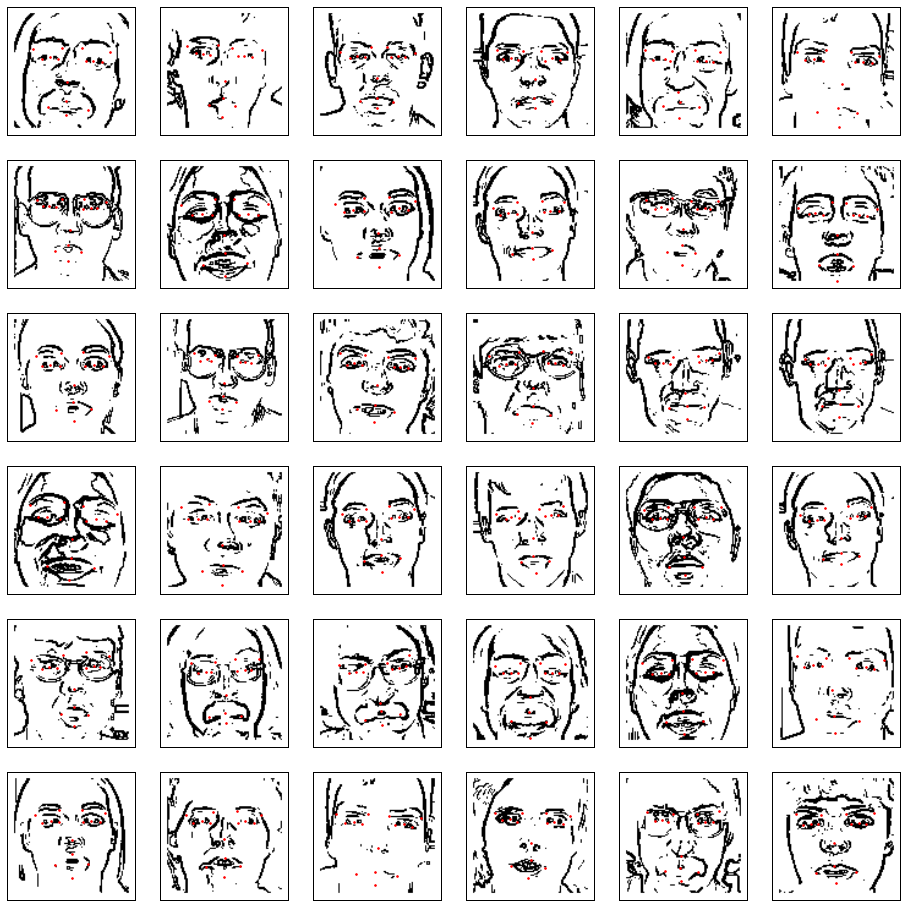

In [24]:
plots.show_preprocessed_imgs(p, X, Y, color = 'red')

## Predicted Keypoints

Using our model.

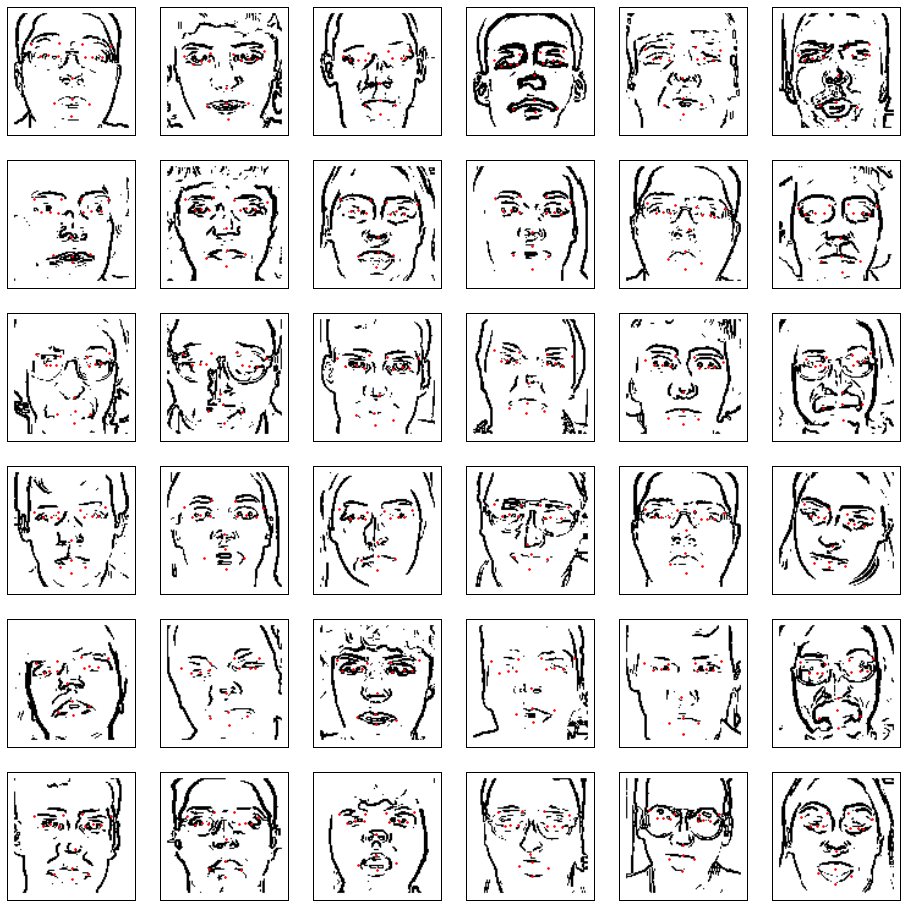

In [25]:
plots.show_preprocessed_imgs(p, Xpredict, Ypredict, color = 'red')

##### Cross Evaluation

Model evaluation with 10 folds.

In [56]:
p.evaluate(estimator, X, Y)

In [64]:
print p.pp_evaluation()

{
    "std": "0.590962", 
    "upper_confidence_bound": "3.0361", 
    "values": "1.98177,1.96392,2.02082,1.94959,1.9733,2.1623,2.50105,3.02525,3.51354,3.35985", 
    "lower_confidence_bound": "1.85417", 
    "mean": "2.44514"
}


In [41]:
# sample to speed up computation. remove parameter for no sampling
train_sizes, train_scores, test_scores = p.learning_curves(sample = 100)

<module 'matplotlib.pyplot' from '/Users/purzelrakete/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

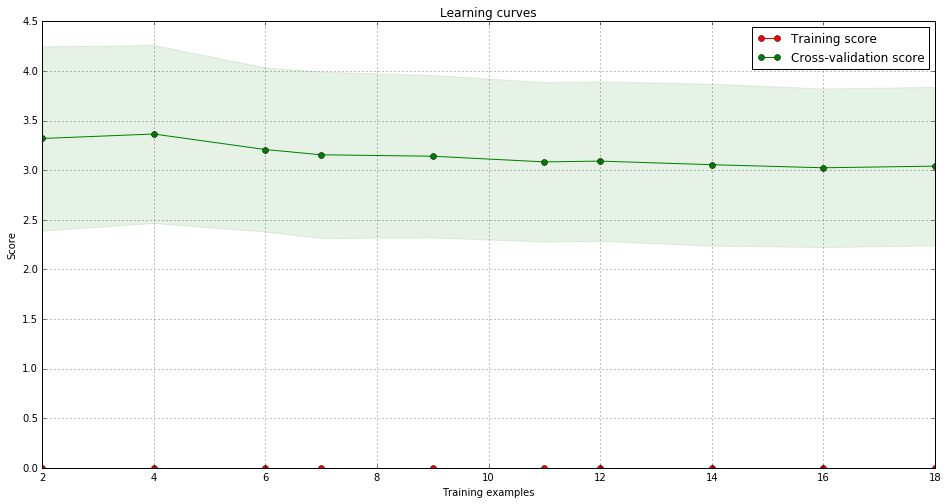

In [43]:
plots.plot_learning_curves(train_sizes, train_scores, test_scores)